# **Edge Detection and Kernels**

In this notebook, we will try to understand **edge detection** using various kinds of **handcrafted filters,** such as:
<br></br>

**1. The Prewitt Filter**

**2. The Sobel Filter**

**3. The Laplacian Filter**

## **Importing the Libraries**

In [ ]:
import numpy as np 
import cv2
from google.colab.patches import cv2_imshow 

We will use the following libraries in this notebook:

*   **Numpy:** Used for creating arrays to represent images and filters.
*   **cv2:** OpenCV - Used for reading images, image processing and applying filters
*   **cv2_imshow:** The Google Colab function for image visualization





## **Edge Detection**

We will go over the three famous examples of handcrafted filters in this section - **The Prewitt Filter, the Sobel Filter and the Laplacian Filter**


### **The Prewitt Filter**

**In the Prewitt edge detector, we use two 3 X 3 kernels - one for horizontal edge detection, and the other for vertical edge detection.**

These two kernels are convolved with the original image to detect **horizontal edges and vertical edges** respectively.

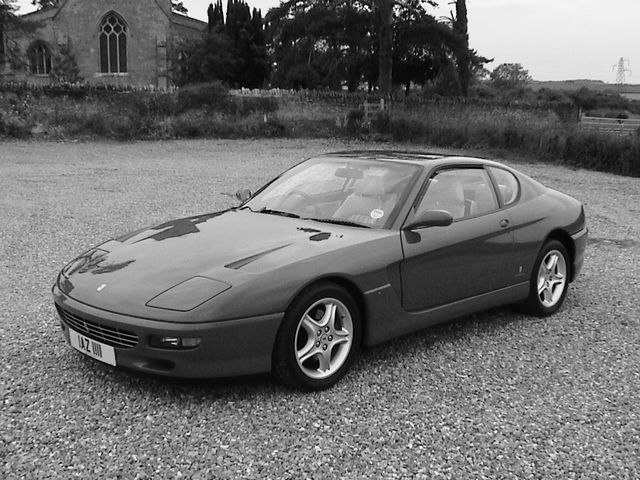

In [ ]:
car = cv2.imread('/content/640px-1995Ferrari456GT.jpg',0) # Reading the image
cv2_imshow(car) # Visualizing the image

We see above a Grayscale image of a Ferrari 456 GT.

In the steps below, we define the two Prewitt edge detectors using Numpy, and by using the **cv2.filter2D** function, we perform convolution operations between the image and these kernels. 

Finally, we "combine" the values from the two edge detectors using **cv2.bitwise_or**, **the Bitwise OR operator.** 

This operator essentially preserves the bright regions from both the filtered outputs, and combines them into one composite output.

You may refer to this link for an intuitive understanding of the Bitwise OR Operator: [Bitwise Operations on Binary Images](https://docs.opencv.org/4.x/d0/d86/tutorial_py_image_arithmetics.html)

We also use **cv2.hconcat** which takes in a list of images, and concatenates them horizontally. All these images should have the same height and the same number of color channels, but can have different widths.


In [ ]:
kernel_x = np.array([[-1,-1,-1],[0,0,0],[1,1,1]]) # Horizontal Edge Detector
kernel_y = np.array([[-1,0,1],[-1,0,1],[-1,0,1]]) # Vertical Edge Detector
print("Horizontal Edge Detector:")
print(kernel_x)
print("Vertical Edge Detector:")
print(kernel_y)

Horizontal Edge Detector:
[[-1 -1 -1]
 [ 0  0  0]
 [ 1  1  1]]
Vertical Edge Detector:
[[-1  0  1]
 [-1  0  1]
 [-1  0  1]]


In [ ]:
prewitt_x=cv2.filter2D(car,-1,kernel_x) # Convolution operation for the input image with the Horizontal Edge Detector
prewitt_y=cv2.filter2D(car,-1,kernel_y) # Convolution operation for the input image with the Vertical Edge Detector

prewitt_xy= cv2.bitwise_or(prewitt_x,prewitt_y) # Combining both edge detectors

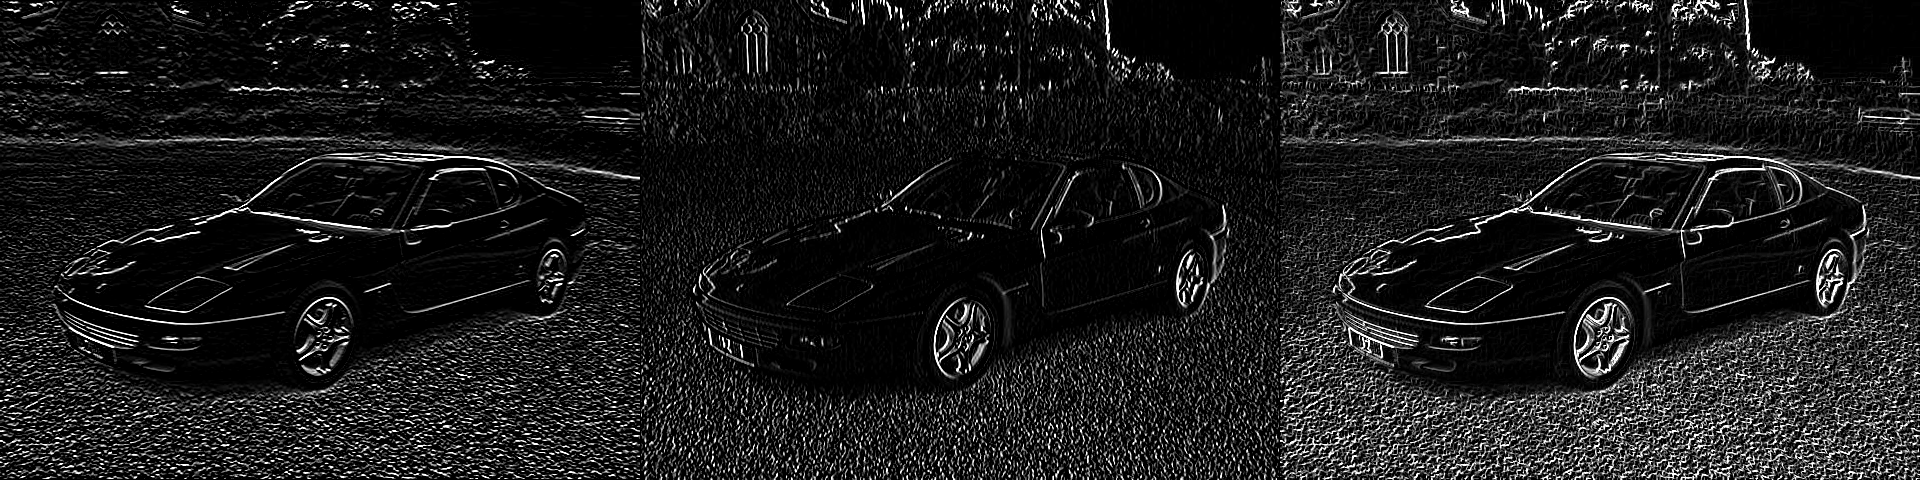

In [ ]:
frame_prewitt=cv2.hconcat((prewitt_x,prewitt_y,prewitt_xy)) # Concatenating the images
cv2_imshow(frame_prewitt) # Visualizing the results

In the above images: 

- **On the left, we have the output from the Horizontal Prewitt Filter**, where as we can see, horizontal edges are more prominent, such as those on the car front and the overall horizontal shapes of the car.

- **In the middle, we have the results of the Vertical Prewitt Filter**, where the main vertical edges of the image are visible. The window of the house, for example, is detected much more clearly here due to its vertical grills.

- **The image on the right is simply the Bitwise OR combination of the two kernel outputs**, and by combining just these two outputs, we see that a significant amount of the original image, including its most important edges, can be well understood.

This is an example of **the efficacy of the Prewitt Filter**, and why it has been used so often in Computer Vision.

### **The Sobel Filter**

The Sobel Filter is similar to the Prewitt Filter, with **the only change being in the center of the edge values, which are marked +2 and -2 instead of +1 and -1.** 

This provides more weightage around the edge region and gives better intensity / enhancement at the edge regions, versus the Prewitt Filter.

The Sobel Filter also uses two kernels, for horizontal and for vertical edge detection respectively.

For implementation, **OpenCV directly provides us the Sobel function.** 
It takes in the following parameters:


*   **src** - The input image which we are interested in.
*   **ddepth** - The depth of the output image. In our code, we use CV_64F, which means 64-bit floating point.
*   **dx and dy** - The direction in which the edges needed to be detected. 
*   **ksize** - Size of the kernel.



In [ ]:
# Sobel Edge Detection
sobelx = cv2.Sobel(src=car, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=3) # Sobel Edge Detection on the X axis used for vertical edge detection
sobely = cv2.Sobel(src=car, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=3) # Sobel Edge Detection on the Y axis used for horizontal edge detection

sobelxy = cv2.bitwise_or(sobelx,sobely) # Combined X and Y Sobel Edge Detection

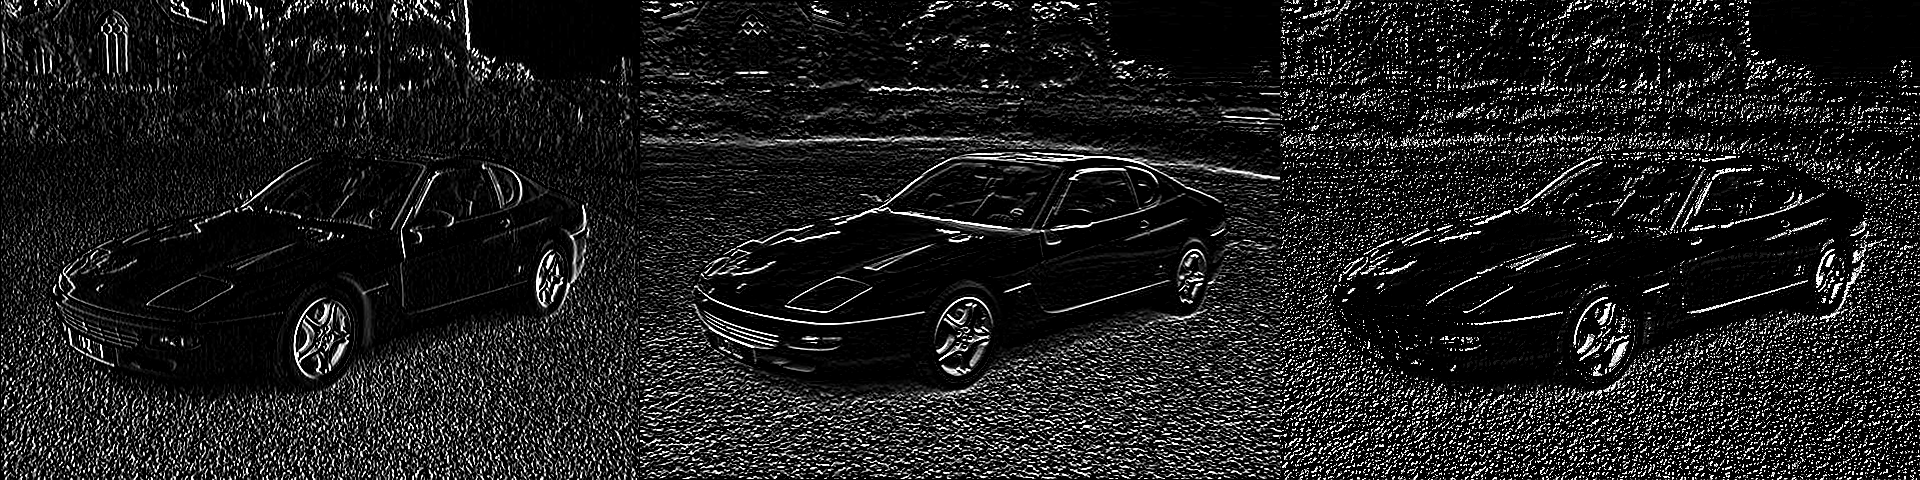

In [ ]:
frame_sobel=cv2.hconcat((sobelx,sobely,sobelxy)) # Concatenating the images
cv2_imshow(frame_sobel) # Visualizing the results

We obtain the above images after applying Sobel edge detection to the input image. The leftmost image is the output of the Sobel vertical edge detector, the one in the middle is the output from the Sobel horizontal edge detector, and the image on the right is a combination of the two. 

Comparing this output with that from the Prewitt filter, we notice that **the Sobel edge detector finds more edges in the image in comparison to Prewitt.** This is the implication of the change where **we allotted more weight to the central edge values** in the kernels for the Sobel filter.

### **The Laplacian Filter**

The Laplacian Filter works by **highlighting those regions where the gradient of pixel intensities changes abruptly.** Unlike the Sobel edge detector,the Laplacian edge detector **uses only one kernel.**

**OpenCV also directly provides the Laplacian function.** The parameters it takes are:


*   **src -** The input image which we are interested.
*   **ddepth -** The depth of the output image.In our code we are using CV_64F means 64 bit floating point.


In [ ]:
laplacian=cv2.Laplacian(car,cv2.CV_64F)

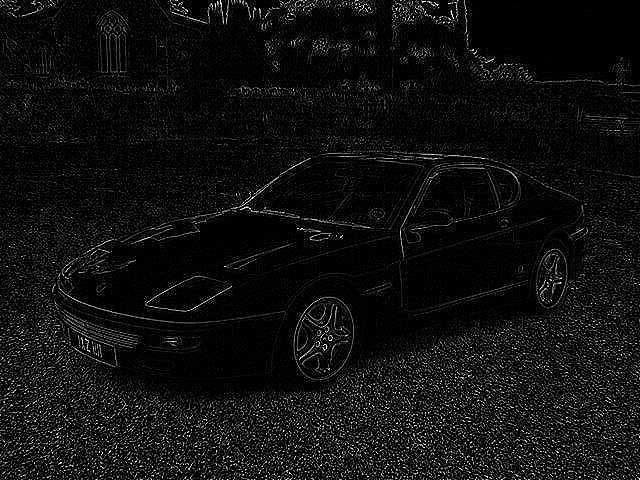

In [ ]:
cv2_imshow(laplacian)

The image above is the output we get after applying the **Laplacian Filter** over the input image.

## **Happy Learning!**